# PCA Tutorial

In this tutorial we will apply the PCA method to some real experimental data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Load up the data set

We have a dataset prepared 

It contains the resutls of measurements of Muon spin relaxation spectra at 11 different temperatures.
At some point in the temperature series the material we are observing undergoes a phase change. The object of this exercise is to try to identify the point at which the data undergoes that change.

In [39]:
data = np.load('./muon-pcs-data.npy')

### Explore the dataset

We will use the `.shape` method to look at the dimensionality of our data.
You will find that the data has 49 dimensions - these are the points at which the spectrum is meansured.
You will also find 11 samples, one for each temperature.
Finally each sample has two columns, the first is the value of the spectrum, the second is the associated uncertainty.

In [41]:
data.shape

(2, 49, 11)

### Plot the data

The first thing we may do is plot the spectra across the temperature range, and see if we can pick out the phase transition clearly from the spectra this way.

Note - below is a nice little set of commands to allow you to build the colour cycle for your plots based on a preset colormap from matplotlib. This is useful to get some kind of idea of a series in your data

In [125]:
import cycler
import matplotlib as mpl

n = 11 ## We have 11 examples to plot
color = plt.cm.coolwarm(np.linspace(0, 1, n))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

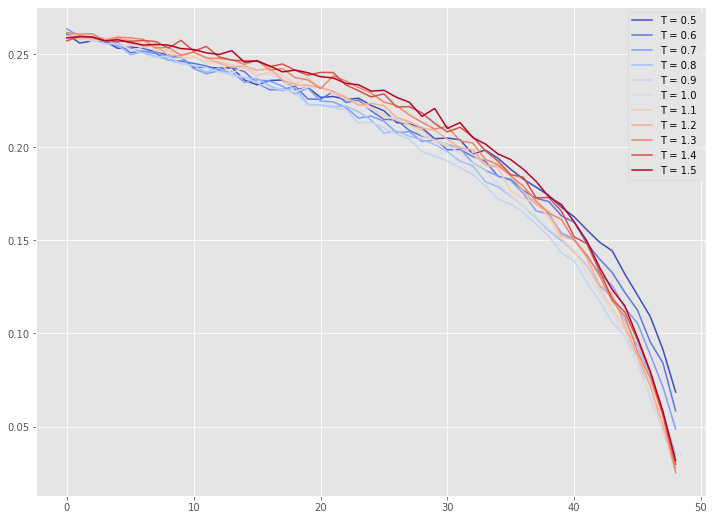

In [163]:
plt.figure(figsize=(12, 9))
for ind, T in enumerate(np.arange(0.5, 1.6, 0.1)):
    plt.plot(data[0, :, ind], label='T = %.1f'%T)
plt.legend()

Perhaps you can see a clear transition in the data above, or more likely you can't.
Let's see if we can us PCA to identify some importnat componenets and see if this data doesn't look clearer in low dimensions.

## Run PCA

Here we are going to use the built in PCA method from scikit-learn. Follow [this link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to read the full documentation on PCA in scikit-learn.

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA()

### Set up the data

We are interested in performing PCA on the sepctral signals - i.e. the first column of the data. 
This should form an $N \times M$ matrix, where $N$ is the number of temperatures (i.e. 11) and $M$ is the dimension of the spectrum (i.e. 49).

In [166]:
input_data = data[0, :, :].T
print('The shape of the input data is: ', input_data.shape)

The shape of the input data is:  (11, 49)


### Perform PCA

Running the PCA is simple, we simply use the `fit` method from the PCA class on the `input_data` we have set up.

In [150]:
pca.fit(input_data)

array([5.73946792e-01, 3.72475223e-01, 1.26431743e-02, 9.39575185e-03,
       8.97963641e-03, 6.67027522e-03, 4.75692389e-03, 4.42545510e-03,
       4.12537736e-03, 2.58139059e-03, 1.18947731e-29])

### Look at the explained variance

As we discussed in the lecture, PCA returns the same dimensionality as the input, but now we can look at the explained variance to see if there are a few new dimensions that capture most of the information about the system.

Text(0, 0.5, 'Explained variance %')

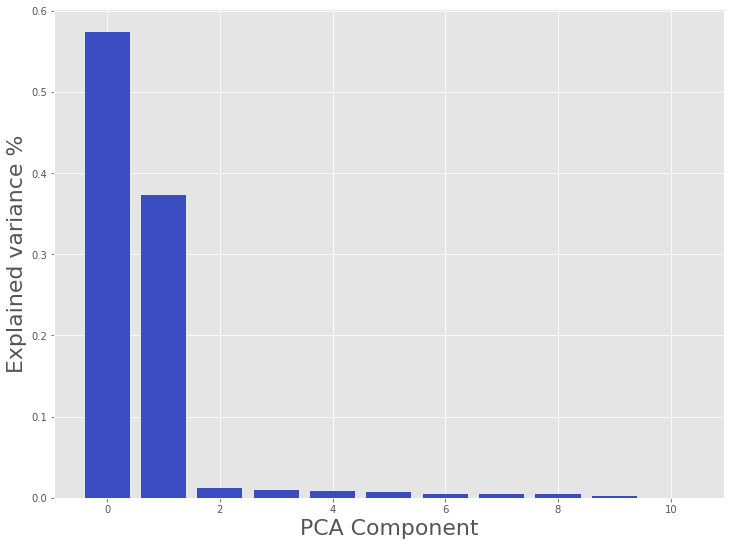

In [137]:
plt.figure(figsize=(12, 9))
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_)
plt.xlabel('PCA Component', size=22)
plt.ylabel('Explained variance %', size=22)

We can see that the first two components capture the majority of the information. This means that we may be able to inpect how each of these components evolves with $T$ to see if we can spot a transition. 

### Inspecting the components

What we are interested in are the coefficients of the components, how much they contribute to the spectrum, and how this contribution evolves with $T$. Therefore, for each $T$ we plot the value of the first component.

Text(0.5, 1.0, 'PC 1')

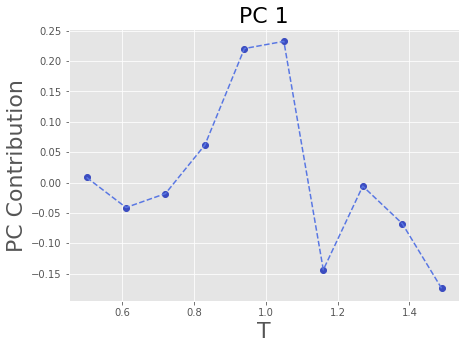

In [187]:
plt.figure(figsize=(7, 5))
tlables = np.arange(0.5, 1.6, (1.6-0.5)/10)
plt.plot(tlables, pca.components_[:-1, 0], 'o')
plt.plot(tlables, pca.components_[:-1, 0], '--')
plt.xlabel('T', size=22)
plt.ylabel('PC Contribution', size=22)
plt.title('PC 1', size=22)

Looking at PC 1 we are able to see clearly that there is an abrupt change at just above T = 1.0. This is much clearer than anything we could get from looking at the full 49 components of the original sectrum.

We can also look at the evolution of of PC 2 - afterall this component also contributed to the variance signficantly.

Text(0.5, 1.0, 'PC 2')

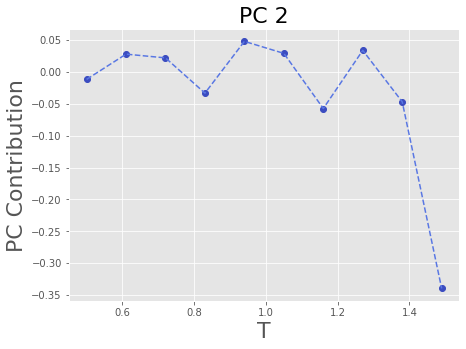

In [188]:
plt.figure(figsize=(7, 5))
tlables = np.arange(0.5, 1.6, (1.6-0.5)/10)
plt.plot(tlables, pca.components_[:-1, 1], 'o')
plt.plot(tlables, pca.components_[:-1, 1], '--')
plt.xlabel('T', size=22)
plt.ylabel('PC Contribution', size=22)
plt.title('PC 2', size=22)

PC 2 reveals another potential phase transtion just above T = 1.4. This was actually never expected in the original data, and the result is currently the subject of further experiments.